In [29]:
#### importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression  ### Model
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
#### Reading the data
data = pd.read_csv("delivery_time.csv") ### Upload the file in jupyter first
#### Checking the 1st Five Rows
data.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
#### To describe the details of the data
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


## Exploratory Data Analysis

In [4]:
#### Checking of Missing Values in the data
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

Text(0.5, 1.0, 'Delivery and Sorting Time Analysis')

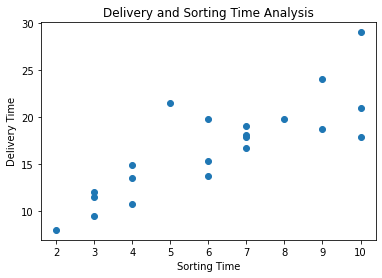

In [5]:
plt.scatter(data['Sorting Time'],data['Delivery Time'])
plt.ylabel("Delivery Time")
plt.xlabel("Sorting Time")
plt.title("Delivery and Sorting Time Analysis")

#### Both the Columns does not have any missing values

In [6]:
##### Checking the Number of rows and Columns 
rows = data.shape[0]
print("The number of rows is - ",rows)
columns = data.shape[1]
print("The number of columns is - ",columns)

The number of rows is -  21
The number of columns is -  2


<AxesSubplot:xlabel='Delivery Time'>

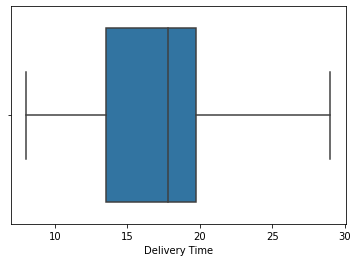

In [31]:
sns.boxplot(x = data['Delivery Time'])

<AxesSubplot:xlabel='Sorting Time'>

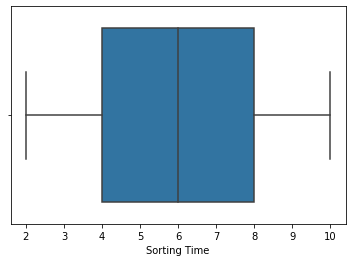

In [32]:
sns.boxplot(x = data['Sorting Time'])

In [ ]:
#### From the above two graph we can see that there are no outliers in both the columns

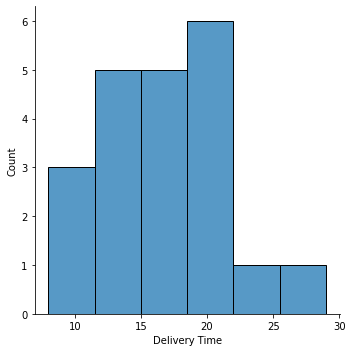

In [35]:
sns.displot(x = data['Delivery Time'])

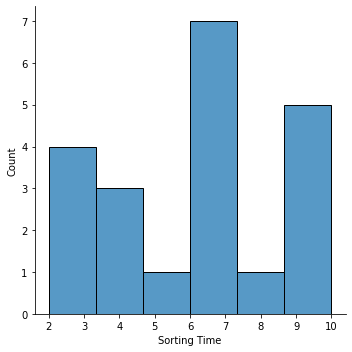

In [36]:
sns.displot(x = data['Sorting Time'])

In [ ]:
#### From the above two graph also we can see that the data is normally distributed

### Linear Regression Model to Predict Delivery Time

In [7]:
### Creating of Dependent and Independent Variables
X = data['Sorting Time'].values
X##### Independent Variable
X = X.reshape(-1,1) #### Reshaping into proper numpy array.

In [8]:
X  ### Independent Variable

array([[10],
       [ 4],
       [ 6],
       [ 9],
       [10],
       [ 6],
       [ 7],
       [ 3],
       [10],
       [ 9],
       [ 8],
       [ 4],
       [ 7],
       [ 3],
       [ 3],
       [ 4],
       [ 6],
       [ 7],
       [ 2],
       [ 7],
       [ 5]], dtype=int64)

In [9]:
y = data['Delivery Time'].values   #### Dependent Variable
y = y.reshape(-1,1)

#### Model Training 

In [10]:
model = LinearRegression()
model_training = model.fit(X,y)
print("The Model is Fitted and Trained")

The Model is Fitted and Trained


#### Model Prediction

In [11]:
prediction = model_training.predict(X)  ####21
prediction

array([[23.07293294],
       [13.17881356],
       [16.47685335],
       [21.42391304],
       [23.07293294],
       [16.47685335],
       [18.12587325],
       [11.52979366],
       [23.07293294],
       [21.42391304],
       [19.77489315],
       [13.17881356],
       [18.12587325],
       [11.52979366],
       [11.52979366],
       [13.17881356],
       [16.47685335],
       [18.12587325],
       [ 9.88077377],
       [18.12587325],
       [14.82783346]])

#### Model Evaluation

In [12]:
### Training Model
Accuracy_training_model = round(model_training.score(X,y)*100,2)  ### Round is used to round of the decimal
print("The Accuracy of the training Model is - ", Accuracy_training_model,"%")

The Accuracy of the training Model is -  68.23 %


In [13]:
### Prediction Accuracy
Accuracy_prediction = round(r2_score(y,prediction)*100,2)
print("The Accuracy of the prediction Model is - ", Accuracy_prediction,"%")

The Accuracy of the prediction Model is -  68.23 %


In [14]:
#### Mean Squared Error
mse = mean_squared_error(y,prediction)
print("The Error of the Model is  - ", round(mse,2))

The Error of the Model is  -  7.79


Text(0.5, 1.0, 'Delivery and Sorting Time Analysis')

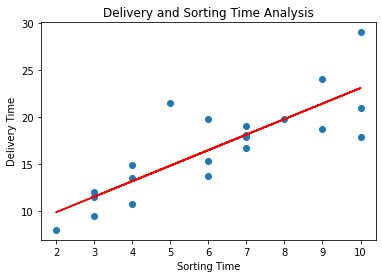

In [15]:
plt.scatter(data['Sorting Time'],data['Delivery Time'])
plt.plot(X,prediction,color='red')
plt.ylabel("Delivery Time")
plt.xlabel("Sorting Time")
plt.title("Delivery and Sorting Time Analysis")

In [16]:
#### Inference - The above figure shows you the best fit line nased on the Delivery time and Sorting Time
### with an accuracy of 68%

##### Log Transformation - 

In [22]:
X_log = np.log(X)
X_log
y_log = np.log(y)
y_log

array([[3.04452244],
       [2.60268969],
       [2.98315349],
       [3.17805383],
       [3.36729583],
       [2.73111547],
       [2.94443898],
       [2.2512918 ],
       [2.88480071],
       [2.93119375],
       [2.98719594],
       [2.37490575],
       [2.8142104 ],
       [2.44234704],
       [2.48740353],
       [2.70001803],
       [2.62103882],
       [2.89646427],
       [2.07944154],
       [2.88088243],
       [3.06805294]])

In [20]:
model_log = LinearRegression()
model_training_log = model_log.fit(X_log,y_log)
print("The Model is Fitted and Trained")

The Model is Fitted and Trained


In [21]:
### Training Model
Accuracy_training_model = round(model_training_log.score(X_log,y_log)*100,2)  ### Round is used to round of the decimal
print("The Accuracy of the training Log Model is - ", Accuracy_training_model,"%")

The Accuracy of the training Log Model is -  77.22 %


##### Squareroot Transformation - 

In [23]:
X_sqrt = np.sqrt(X)
X_sqrt
y_sqrt = np.sqrt(y)
y_sqrt

array([[4.58257569],
       [3.67423461],
       [4.44409721],
       [4.89897949],
       [5.38516481],
       [3.9179076 ],
       [4.35889894],
       [3.082207  ],
       [4.23083916],
       [4.33012702],
       [4.45308882],
       [3.27871926],
       [4.08411557],
       [3.39116499],
       [3.46842904],
       [3.8574603 ],
       [3.70809924],
       [4.25558457],
       [2.82842712],
       [4.22255847],
       [4.63680925]])

In [24]:
model_sqrt = LinearRegression()
model_training_sqrt = model_sqrt.fit(X_sqrt,y_sqrt)
print("The Model is Fitted and Trained")

The Model is Fitted and Trained


In [25]:
### Training Model
Accuracy_training_model = round(model_training_sqrt.score(X_sqrt,y_sqrt)*100,2)  ### Round is used to round of the decimal
print("The Accuracy of the training Sqrt Model is - ", Accuracy_training_model,"%")

The Accuracy of the training Sqrt Model is -  72.92 %


##### Square Transformation - 

In [26]:
X_square = np.square(X)
X_square
y_square = np.square(y)
y_square

array([[441.    ],
       [182.25  ],
       [390.0625],
       [576.    ],
       [841.    ],
       [235.6225],
       [361.    ],
       [ 90.25  ],
       [320.41  ],
       [351.5625],
       [393.2289],
       [115.5625],
       [278.2224],
       [132.25  ],
       [144.7209],
       [221.4144],
       [189.0625],
       [327.9721],
       [ 64.    ],
       [317.9089],
       [462.25  ]])

In [27]:
model_square = LinearRegression()
model_training_square = model_square.fit(X_square,y_square)
print("The Model is Fitted and Trained")

The Model is Fitted and Trained


In [28]:
### Training Model
Accuracy_training_model = round(model_training_square.score(X_square,y_square)*100,2)  ### Round is used to round of the decimal
print("The Accuracy of the training Sqrt Model is - ", Accuracy_training_model,"%")

The Accuracy of the training Sqrt Model is -  58.82 %
